In [1]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import geopandas as gpd
import pyproj
import json

In [4]:
# Read the shapefile using geopandas
shapefile_path = '/content/drive/MyDrive/proyecto_mapa/shape/parques.shp'
gdf = gpd.read_file(shapefile_path)

In [5]:
gdf

,OBJECTID,ID_PARQUE,ESTRATO,ID_UPZ,NOMBRE_PAR,CODIGOPOT,TIPOPARQUE,LOCNOMBRE,ADMINISTRA,ESTADO_CER,ID_LOCALID,FECHAINCOR,SHAPE_AREA,SHAPE_LEN,geometry
0,50,09-371,4,UPZ112,VILLA ALSACIA LOTE 1,NaN,PARQUE VECINAL,FONTIBON,NaN,INVESTIGADO NO CERTIFICADO,9.0,2004-01-01,9054.452153,1483.630750,"MULTIPOLYGON (((-8251596.017 517697.097, -8251..."
1,51,11-552,2,UPZ71,URBANIZACION PUERTA DEL SOL,NaN,PARQUE VECINAL,SUBA,NaN,CERTIFICADO,11.0,2006-05-20,1092.129365,173.547851,"POLYGON ((-8249504.402 528846.983, -8249504.39..."
2,52,11-566,3,UPZ27,LA FONTANA,NaN,PARQUE VECINAL,SUBA,NaN,CERTIFICADO,11.0,2004-01-01,3116.914950,319.903534,"POLYGON ((-8249118.683 529555.749, -8249125.46..."
3,53,16-206,3,UPZ40,VERAGUAS CENTRAL (BARRIO COMUNEROS Y BOCHICA),NaN,PARQUE VECINAL,PUENTE ARANDA,NaN,CERTIFICADO,16.0,2004-01-01,6551.828359,346.864294,"POLYGON ((-8249037.973 513198.484, -8249036.72..."
4,54,16-190,3,UPZ41,URBANIZACION MUZU I ETAPA (OSPINA PREZ),NaN,PARQUE DE BOLSILLO,PUENTE ARANDA,NaN,CERTIFICADO,16.0,2004-01-01,277.904632,101.515558,"POLYGON ((-8252371.670 512171.134, -8252353.16..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5310,5277,07-457,2,UPZ87,Urbanizacion Ciudadela El Recreo,NaN,PARQUE VECINAL,BOSA,NaN,CERTIFICADO,7.0,2019-08-15,5435.041248,334.651573,"POLYGON ((-8259883.891 515641.781, -8259884.88..."
5311,5278,05-499,2,UPZ56,CIUDAD NUEVO MILENIO,NaN,PARQUE VECINAL,USME,NaN,CERTIFICADO,5.0,2019-08-15,23613.722538,1103.516899,"POLYGON ((-8250605.471 504720.760, -8250607.83..."
5312,5279,01-582,4,UPZ9,Horizontes Norte,NaN,PARQUE VECINAL,USAQUEN,NaN,CERTIFICADO,1.0,2019-08-27,3380.590343,291.910618,"POLYGON ((-8240387.686 530340.996, -8240385.36..."
5313,5280,01-138,3,UPZ9,El Palmar,NaN,PARQUE DE BOLSILLO,USAQUEN,NaN,CERTIFICADO,1.0,2015-01-08,1005.348859,127.065894,"POLYGON ((-8240879.431 531428.979, -8240855.56..."


In [6]:
from shapely.geometry import Polygon
import pandas as pd

geo1 = gpd.read_file("/content/drive/MyDrive/proyecto_mapa/mygeodata/PACA_NODO_CENTRO.geojson")
geo2 = gpd.read_file(open('/content/drive/MyDrive/proyecto_mapa/mygeodata/PACA_NODO_CENTROI.geojson'))
geo3 = gpd.read_file(open('/content/drive/MyDrive/proyecto_mapa/mygeodata/PACA_NODO_NORTE.geojson'))
geo4 = gpd.read_file(open('/content/drive/MyDrive/proyecto_mapa/mygeodata/PACA_NODO_NORTE_2.geojson'))
geo5 = gpd.read_file(open('/content/drive/MyDrive/proyecto_mapa/mygeodata/PACA_NODO_OCCIDENTAL.geojson'))
geo6 = gpd.read_file(open('/content/drive/MyDrive/proyecto_mapa/mygeodata/PACA_NODO_SUR.geojson'))
geo7 = gpd.read_file(open('/content/drive/MyDrive/proyecto_mapa/mygeodata/PACA_NODO_SUR_OCCIDENTE.geojson'))
lista_pacas = [geo1, geo2,geo3,geo4,geo5,geo6,geo7]

df_pacas = pd.concat(lista_pacas, axis=0)

# Define the coordinates of the polygon that represents the area of interest
polygon_coords = [(-74.5, 4.8), (-73.1, 4.8), (-73.1, 4.5), (-74.5, 4.5)]

# Create a Polygon object from the coordinates
polygon = Polygon(polygon_coords)

# Filter the points in the GeoDataFrame that are within the polygon
df_pacas = df_pacas[df_pacas.geometry.within(polygon)]

In [7]:
df_pacas.head(5)

,Name,description,gx_media_links,geometry
0,Paca Armenia-nodo centro,"<img src=""https://doc-0c-38-mymaps.googleuserc...",https://doc-0c-38-mymaps.googleusercontent.com...,POINT Z (-74.07344 4.61759 0.00000)
1,Centro Nariño,"<img src=""https://doc-0g-38-mymaps.googleuserc...",https://doc-0g-38-mymaps.googleusercontent.com...,POINT Z (-74.08726 4.62776 0.00000)
2,Parque Pony,Nodo Centro Teusaquillo,NaN,POINT Z (-74.07201 4.61905 0.00000)
3,Santa Isabel,"<img src=""https://doc-0c-38-mymaps.googleuserc...",https://doc-0c-38-mymaps.googleusercontent.com...,POINT Z (-74.09707 4.60090 0.00000)
4,Paca San Luis.,NaN,NaN,POINT Z (-74.06932 4.64842 0.00000)


In [8]:
import geopandas as gpd
import pandas as pd

# Print basic information about the GeoDataFrame
print("Number of parks:", len(gdf))
print("Columns:", list(gdf.columns))

# Descriptive statistics of numerical columns
numerical_cols = ['SHAPE_AREA', 'SHAPE_LEN']  # Replace with your actual numerical columns
numerical_stats = gdf[numerical_cols].describe()
print("\nEstadísticas de las columnas Númericas:")
print(numerical_stats)

# Descriptive statistics of categorical columns
categorical_cols = ['TIPOPARQUE']  # Replace with your actual categorical columns
categorical_stats = gdf[categorical_cols].describe()
print("\nEstadísticas de las columnas Categóricas:")
print(categorical_stats)

# Spatial analysis
print("\nCuadro delimitador de los parques:")
print(gdf.total_bounds)
print("\nCrs of the GeoDataFrame:")
print(gdf.crs)

Number of parks: 5315
Columns: ['OBJECTID', 'ID_PARQUE', 'ESTRATO', 'ID_UPZ', 'NOMBRE_PAR', 'CODIGOPOT', 'TIPOPARQUE', 'LOCNOMBRE', 'ADMINISTRA', 'ESTADO_CER', 'ID_LOCALID', 'FECHAINCOR', 'SHAPE_AREA', 'SHAPE_LEN', 'geometry']

Estadísticas de las columnas Númericas:
         SHAPE_AREA     SHAPE_LEN
count  5.315000e+03   5315.000000
mean   7.192455e+03    377.930083
std    4.982053e+04    567.540184
min    1.309785e+01     17.407835
25%    8.072459e+02    137.628850
50%    1.795160e+03    221.452359
75%    4.471819e+03    394.411212
max    2.134285e+06  12404.504398

Estadísticas de las columnas Categóricas:
            TIPOPARQUE
count             5315
unique               8
top     PARQUE VECINAL
freq              3496

Cuadro delimitador de los parques:
[-8272734.405    448799.1304 -8238910.7136   537745.9156]

Crs of the GeoDataFrame:
EPSG:3857


In [9]:
target_crs = pyproj.CRS.from_epsg(4326)

# Convert the GeoDataFrame to GeoJSON
geojson = gdf.to_crs(target_crs)

In [10]:
polygons = geojson
points = df_pacas

# Create an empty DataFrame to store the results
nombre_paca, resultspolygons, resultspoints, nombre, estrato, localidad, tipo_parque, shape_area, shape_len, geometry = [], [], [], [], [], [], [], [], [], []

# Iterate over each point
for point_idx, point in points.iterrows():
    nearest_polygon_id = None
    min_distance = float('inf')

    # Iterate over each polygon
    for polygon_idx, polygon in polygons.iterrows():
        # Calculate the distance between the point and the polygon
        distance = point.geometry.distance(polygon.geometry)

        # Check if this distance is the smallest so far
        if distance < min_distance:
            min_distance = distance
            nearest_polygon_id = polygon_idx

    # Store the results in the DataFrame
    nombre_paca.append(point['Name'])
    resultspoints.append(point_idx)
    resultspolygons.append(nearest_polygon_id)
    estrato.append(gdf['ESTRATO'][resultspolygons[-1]])
    localidad.append(gdf['LOCNOMBRE'][resultspolygons[-1]])
    nombre.append(gdf['NOMBRE_PAR'][resultspolygons[-1]])
    tipo_parque.append(gdf['TIPOPARQUE'][resultspolygons[-1]])
    shape_area.append(gdf['SHAPE_AREA'][resultspolygons[-1]])
    shape_len.append(gdf['SHAPE_LEN'][resultspolygons[-1]])
    geometry.append(gdf['geometry'].centroid[resultspolygons[-1]])



    
df = pd.DataFrame(list(zip(nombre_paca, resultspoints, resultspolygons,nombre, estrato, localidad,tipo_parque, shape_area, shape_len, geometry)), columns =['Nombre_Paca','Points', 'ID_parque','Nombre_parque','Estrato', 'Localidad','Tipo_Parque','Area', 'Largo', 'geometry'])

In [11]:
df

,Nombre_Paca,Points,ID_parque,Nombre_parque,Estrato,Localidad,Tipo_Parque,Area,Largo,geometry
0,Paca Armenia-nodo centro,0,4544,URBANIZACION ARMENIA,4,TEUSAQUILLO,PARQUE VECINAL,2666.464008,208.870101,POINT (-8245818.279549808 514576.0717764879)
1,Centro Nariño,1,1200,URBANIZACION PARQUE TACAY,4,TEUSAQUILLO,PARQUE VECINAL,1399.415916,362.859602,POINT (-8247238.826336118 515590.97772250214)
2,Parque Pony,2,2080,BARRIO ARMENIA,4,TEUSAQUILLO,PARQUE VECINAL,2331.865134,264.290205,POINT (-8245653.357137434 514746.4405766512)
3,Santa Isabel,3,246,URBANIZACION VERAGUAS II,3,MARTIRES,PARQUE VECINAL,2046.177669,181.629313,POINT (-8248346.4510245165 512751.9279566987)
4,Paca San Luis.,4,2409,URBANIZACION SAN LUIS,4,TEUSAQUILLO,PARQUE VECINAL,7979.450020,363.986268,POINT (-8245343.665025204 518007.04299852706)
...,...,...,...,...,...,...,...,...,...,...
140,Paca Puente Aranda Renace San Rafael,3,708,LOS EUCALIPTOS,3,PUENTE ARANDA,PARQUE VECINAL,1738.612821,180.066099,POINT (-8250384.321565102 514851.0171047046)
141,Paca huerta copetones,4,3259,SANTA MATILDE II SECTOR,3,PUENTE ARANDA,PARQUE VECINAL,9113.381883,458.903382,POINT (-8249992.069054481 512708.9345086035)
142,Paca huerta san eusebio,5,2533,SAN EUSEBIO,3,PUENTE ARANDA,PARQUE VECINAL,7327.952909,632.089237,POINT (-8251296.2650701 513153.3437207333)
143,pacas huerta pradera,6,2534,URBANIZACION LA PRADERA SUR (ANTES SALAZAR-GOMEZ),3,PUENTE ARANDA,PARQUE VECINAL,5546.512496,406.526368,POINT (-8251280.681657427 515213.9905630666)


In [12]:
df_1 = pd.read_excel("/content/drive/MyDrive/proyecto_mapa/bogota_poblacion.xlsx")
df_1.head(5)

,N.º,Localidad,Códigos Postales,Superficie,Poblacion,Densidad,Latitud,Longitud
0,1,Usaquen,110111-110151,65.54,501999,7686.40,-74.031,4.749
1,2,Chapinero,110211-110231,35.78,139701,3661.88,-74.047,4.657
2,3,Santafe,110311-110321,44.82,110048,2436.30,-74.030,4.596
3,4,San cristobal,110411-110441,48.83,387736,8243.98,-74.088,4.546
4,5,Usme,110511-110571,122.63,457302,2126.39,-74.103,4.477


In [13]:
column_names_map = {
    'NOMBRE_PAR': 'Nombre_parque',
    'LOCNOMBRE': 'Localidad',
    'ESTRATO': 'Estrato',
    'TIPOPARQUE': 'Tipo_Parque',
    'SHAPE_AREA': 'Area',
    'SHAPE_LEN': 'Largo'
}

# Rename the columns using the dictionary
gdf.rename(columns=column_names_map, inplace=True)

In [14]:
df["Localidad"] = df["Localidad"].str.strip().str.replace("¥", "y").str.capitalize()
df_1["Localidad"] = df_1["Localidad"].str.strip().str.replace("¥", "y").str.capitalize()
gdf["Localidad"] = gdf["Localidad"].str.strip().str.replace("¥", "y").str.capitalize()

In [15]:
df3 = df_1[["Localidad", "Poblacion", "Densidad"]]

In [16]:
df_f = pd.merge(df, df3, on="Localidad", how="left")

In [17]:
df_f

,Nombre_Paca,Points,ID_parque,Nombre_parque,Estrato,Localidad,Tipo_Parque,Area,Largo,geometry,Poblacion,Densidad
0,Paca Armenia-nodo centro,0,4544,URBANIZACION ARMENIA,4,Teusaquillo,PARQUE VECINAL,2666.464008,208.870101,POINT (-8245818.279549808 514576.0717764879),153025,10784.00
1,Centro Nariño,1,1200,URBANIZACION PARQUE TACAY,4,Teusaquillo,PARQUE VECINAL,1399.415916,362.859602,POINT (-8247238.826336118 515590.97772250214),153025,10784.00
2,Parque Pony,2,2080,BARRIO ARMENIA,4,Teusaquillo,PARQUE VECINAL,2331.865134,264.290205,POINT (-8245653.357137434 514746.4405766512),153025,10784.00
3,Santa Isabel,3,246,URBANIZACION VERAGUAS II,3,Martires,PARQUE VECINAL,2046.177669,181.629313,POINT (-8248346.4510245165 512751.9279566987),99119,15225.65
4,Paca San Luis.,4,2409,URBANIZACION SAN LUIS,4,Teusaquillo,PARQUE VECINAL,7979.450020,363.986268,POINT (-8245343.665025204 518007.04299852706),153025,10784.00
...,...,...,...,...,...,...,...,...,...,...,...,...
140,Paca Puente Aranda Renace San Rafael,3,708,LOS EUCALIPTOS,3,Puente aranda,PARQUE VECINAL,1738.612821,180.066099,POINT (-8250384.321565102 514851.0171047046),258287,14921.25
141,Paca huerta copetones,4,3259,SANTA MATILDE II SECTOR,3,Puente aranda,PARQUE VECINAL,9113.381883,458.903382,POINT (-8249992.069054481 512708.9345086035),258287,14921.25
142,Paca huerta san eusebio,5,2533,SAN EUSEBIO,3,Puente aranda,PARQUE VECINAL,7327.952909,632.089237,POINT (-8251296.2650701 513153.3437207333),258287,14921.25
143,pacas huerta pradera,6,2534,URBANIZACION LA PRADERA SUR (ANTES SALAZAR-GOMEZ),3,Puente aranda,PARQUE VECINAL,5546.512496,406.526368,POINT (-8251280.681657427 515213.9905630666),258287,14921.25


In [18]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_f['Tipo_Parque_E'] = label_encoder.fit_transform(df_f['Tipo_Parque'])
gdf['Tipo_Parque_E'] = label_encoder.fit_transform(gdf['Tipo_Parque'])

In [19]:
gdf.loc[~gdf['Estrato'].str.isnumeric(), 'Estrato'] = '0'

In [20]:
gdf['Estrato'].unique()

array(['4', '2', '3', '1', '6', '5', '0'], dtype=object)

In [21]:
subset_gdf = gdf[["Nombre_parque", "Estrato", "Tipo_Parque", 'Localidad', 'Area', 'Largo', 'Tipo_Parque_E', 'geometry']]

In [22]:
df_parques = pd.merge(subset_gdf, df3, on="Localidad", how="left")

In [23]:
df_parques.head(5)

,Nombre_parque,Estrato,Tipo_Parque,Localidad,Area,Largo,Tipo_Parque_E,geometry,Poblacion,Densidad
0,VILLA ALSACIA LOTE 1,4,PARQUE VECINAL,Fontibon,9054.452153,1483.630750,5,"MULTIPOLYGON (((-8251596.017 517697.097, -8251...",394648.0,11858.41
1,URBANIZACION PUERTA DEL SOL,2,PARQUE VECINAL,Suba,1092.129365,173.547851,5,"POLYGON ((-8249504.402 528846.983, -8249504.39...",1348372.0,12117.27
2,LA FONTANA,3,PARQUE VECINAL,Suba,3116.914950,319.903534,5,"POLYGON ((-8249118.683 529555.749, -8249125.46...",1348372.0,12117.27
3,VERAGUAS CENTRAL (BARRIO COMUNEROS Y BOCHICA),3,PARQUE VECINAL,Puente aranda,6551.828359,346.864294,5,"POLYGON ((-8249037.973 513198.484, -8249036.72...",258287.0,14921.25
4,URBANIZACION MUZU I ETAPA (OSPINA PREZ),3,PARQUE DE BOLSILLO,Puente aranda,277.904632,101.515558,1,"POLYGON ((-8252371.670 512171.134, -8252353.16...",258287.0,14921.25


In [24]:
df_parques = df_parques[df_parques['Poblacion'].notna()]
df_parques = df_parques[df_parques['Densidad'].notna()]

In [25]:
len(df_parques)

5313

In [26]:
df_parques = df_parques[~df_parques['Nombre_parque'].isin(df_f)]

In [27]:
len(df_parques)

5313

In [28]:
search_string = "URBANIZACION PARQUE TACAY"  # Replace with the string you want to search for

# Check if the search string is present in the column
result = df_parques['Nombre_parque'].str.contains(search_string)

In [29]:
result

0       False
1       False
2       False
3       False
4       False
        ...  
5310    False
5311    False
5312    False
5313    False
5314    False
Name: Nombre_parque, Length: 5313, dtype: bool

In [30]:
df[result]

<ipython-input-30-c76efcb14353>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[result]


,Nombre_Paca,Points,ID_parque,Nombre_parque,Estrato,Localidad,Tipo_Parque,Area,Largo,geometry


In [31]:
n = 500  # Number of random rows to select

# Get random rows from the DataFrame
random_df = df_parques.sample(n)

In [32]:
random_df['Paca_presente']= 0
df_f['Paca_presente'] = 1

In [33]:
result_df = pd.concat([df_f, random_df])

In [34]:
result_df

,Nombre_Paca,Points,ID_parque,Nombre_parque,Estrato,Localidad,Tipo_Parque,Area,Largo,geometry,Poblacion,Densidad,Tipo_Parque_E,Paca_presente
0,Paca Armenia-nodo centro,0.0,4544.0,URBANIZACION ARMENIA,4,Teusaquillo,PARQUE VECINAL,2666.464008,208.870101,POINT (-8245818.279549808 514576.0717764879),153025.0,10784.00,3,1
1,Centro Nariño,1.0,1200.0,URBANIZACION PARQUE TACAY,4,Teusaquillo,PARQUE VECINAL,1399.415916,362.859602,POINT (-8247238.826336118 515590.97772250214),153025.0,10784.00,3,1
2,Parque Pony,2.0,2080.0,BARRIO ARMENIA,4,Teusaquillo,PARQUE VECINAL,2331.865134,264.290205,POINT (-8245653.357137434 514746.4405766512),153025.0,10784.00,3,1
3,Santa Isabel,3.0,246.0,URBANIZACION VERAGUAS II,3,Martires,PARQUE VECINAL,2046.177669,181.629313,POINT (-8248346.4510245165 512751.9279566987),99119.0,15225.65,3,1
4,Paca San Luis.,4.0,2409.0,URBANIZACION SAN LUIS,4,Teusaquillo,PARQUE VECINAL,7979.450020,363.986268,POINT (-8245343.665025204 518007.04299852706),153025.0,10784.00,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4583,NaN,NaN,NaN,PUENTE LARGO TERCERO Y CUARTO SECTOR,5,Suba,PARQUE VECINAL,2636.113595,251.811061,"POLYGON ((-8244859.5222 523561.8528999984, -82...",1348372.0,12117.27,5,0
1641,NaN,NaN,NaN,QUIROGA,3,Rafael uribe,PARQUE ZONAL,6899.133889,433.654031,POLYGON ((-8250374.829600001 510523.1121999994...,374246.0,27060.44,6,0
4750,NaN,NaN,NaN,Urbanizacion CasaBlanca,4,Suba,PARQUE VECINAL,4614.572124,393.587420,"POLYGON ((-8245096.0239 528386.3035000004, -82...",1348372.0,12117.27,5,0
2663,NaN,NaN,NaN,URBANIZACION ACEVEDO TEJADA,3,Teusaquillo,PARQUE VECINAL,3075.156199,241.477230,"POLYGON ((-8246688.3212 516089.59870000184, -8...",153025.0,10784.00,5,0


In [35]:
result_df = result_df[result_df['Poblacion'].notna()]
result_df = result_df[result_df['Densidad'].notna()]

# Modelo 1

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

#label_encoder = LabelEncoder()
#result_df['Tipo_parque_E'] = label_encoder.fit_transform(result_df['Tipo_Parque'])

# Select relevant features and target variable
features = ['Estrato', 'Tipo_Parque_E', 'Area', 'Largo', 'Poblacion', 'Densidad']
target = 'Paca_presente'

# Step 2: Splitting Data
X = result_df[features]
y = result_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Feature Scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Model Selection and Training
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Step 5: Model Evaluation
#accuracy = model.score(X_test_scaled, y_test)
#print(f"Accuracy: {accuracy}")

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", round(accuracy,3))
print("Precision:", round(precision,3))
print("Recall:", round(recall,3))
print("F1-Score:", round(f1,3))
print("ROC AUC:", round(roc_auc,3))

Accuracy: 0.791
Precision: 0.7
Recall: 0.4
F1-Score: 0.509
ROC AUC: 0.668


# Modelo 2

In [37]:
# Step 4: Model Selection and Training
model_2 = LogisticRegression(class_weight='balanced')
model_2.fit(X_train_scaled, y_train)

# Step 5: Model Evaluation
#accuracy = model.score(X_test_scaled, y_test)
#print(f"Accuracy: {accuracy}")

y_pred_2 = model_2.predict(X_test_scaled)

accuracy_2 = accuracy_score(y_test, y_pred_2)
precision_2 = precision_score(y_test, y_pred_2)
recall_2 = recall_score(y_test, y_pred_2)
f1_2 = f1_score(y_test, y_pred_2)
roc_auc_2 = roc_auc_score(y_test, y_pred_2)

# Print the evaluation metrics
print("Accuracy:", round(accuracy_2,3))
print("Precision:", round(precision_2,3))
print("Recall:", round(recall_2,3))
print("F1-Score:", round(f1_2,3))
print("ROC AUC:", round(roc_auc_2,3))

Accuracy: 0.713
Precision: 0.479
Recall: 0.657
F1-Score: 0.554
ROC AUC: 0.696


# Modelo 3

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, balanced_accuracy_score

# Define the hyperparameters grid
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
    'class_weight': [None, 'balanced'],
    'fit_intercept': [True, False],
    'max_iter': [100, 200, 500]
}

# Create a logistic regression model
logreg = LogisticRegression(class_weight='balanced')

# Define the scoring metric as balanced accuracy
scorer = make_scorer(balanced_accuracy_score)

# Perform grid search with cross-validation
grid_search = GridSearchCV(logreg, param_grid, scoring=scorer, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Evaluate the model with the best hyperparameters
best_logreg = grid_search.best_estimator_
y_pred_3 = best_logreg.predict(X_test_scaled)

accuracy_3 = accuracy_score(y_test, y_pred_3)
precision_3 = precision_score(y_test, y_pred_3)
recall_3 = recall_score(y_test, y_pred_3)
f1_3 = f1_score(y_test, y_pred_3)
roc_auc_3 = roc_auc_score(y_test, y_pred_3)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Balanced Accuracy:", round(grid_search.best_score_,3))

# Print the evaluation metrics
print("Accuracy:", round(accuracy_3,3))
print("Precision:", round(precision_3,3))
print("Recall:", round(recall_3,3))
print("F1-Score:", round(f1_3,3))
print("ROC AUC:", round(roc_auc_3,3))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Best Hyperparameters: {'C': 10, 'class_weight': 'balanced', 'fit_intercept': True, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best Balanced Accuracy: 0.764
Accuracy: 0.744
Precision: 0.521
Recall: 0.714
F1-Score: 0.602
ROC AUC: 0.735


# Predicciones

In [39]:
subset_parques= df_parques[['Estrato', 'Tipo_Parque_E', 'Area', 'Largo', 'Poblacion', 'Densidad']]

In [40]:
subset_parques

,Estrato,Tipo_Parque_E,Area,Largo,Poblacion,Densidad
0,4,5,9054.452153,1483.630750,394648.0,11858.41
1,2,5,1092.129365,173.547851,1348372.0,12117.27
2,3,5,3116.914950,319.903534,1348372.0,12117.27
3,3,5,6551.828359,346.864294,258287.0,14921.25
4,3,1,277.904632,101.515558,258287.0,14921.25
...,...,...,...,...,...,...
5310,2,5,5435.041248,334.651573,673077.0,28126.91
5311,2,5,23613.722538,1103.516899,457302.0,2126.39
5312,4,5,3380.590343,291.910618,501999.0,7686.40
5313,3,1,1005.348859,127.065894,501999.0,7686.40


In [41]:
# Step 6: Predicting Probabilities
new_parks = subset_parques  # Prepare the feature data for new parks
new_parks_scaled = scaler.transform(new_parks)
probabilities = best_logreg.predict_proba(new_parks_scaled)[:, 1]

In [42]:
df_parques['Probabilidad_Parque'] = probabilities

In [43]:
df_parques

,Nombre_parque,Estrato,Tipo_Parque,Localidad,Area,Largo,Tipo_Parque_E,geometry,Poblacion,Densidad,Probabilidad_Parque
0,VILLA ALSACIA LOTE 1,4,PARQUE VECINAL,Fontibon,9054.452153,1483.630750,5,"MULTIPOLYGON (((-8251596.017 517697.097, -8251...",394648.0,11858.41,0.677558
1,URBANIZACION PUERTA DEL SOL,2,PARQUE VECINAL,Suba,1092.129365,173.547851,5,"POLYGON ((-8249504.402 528846.983, -8249504.39...",1348372.0,12117.27,0.035274
2,LA FONTANA,3,PARQUE VECINAL,Suba,3116.914950,319.903534,5,"POLYGON ((-8249118.683 529555.749, -8249125.46...",1348372.0,12117.27,0.073091
3,VERAGUAS CENTRAL (BARRIO COMUNEROS Y BOCHICA),3,PARQUE VECINAL,Puente aranda,6551.828359,346.864294,5,"POLYGON ((-8249037.973 513198.484, -8249036.72...",258287.0,14921.25,0.301834
4,URBANIZACION MUZU I ETAPA (OSPINA PREZ),3,PARQUE DE BOLSILLO,Puente aranda,277.904632,101.515558,1,"POLYGON ((-8252371.670 512171.134, -8252353.16...",258287.0,14921.25,0.740425
...,...,...,...,...,...,...,...,...,...,...,...
5310,Urbanizacion Ciudadela El Recreo,2,PARQUE VECINAL,Bosa,5435.041248,334.651573,5,"POLYGON ((-8259883.891 515641.781, -8259884.88...",673077.0,28126.91,0.138111
5311,CIUDAD NUEVO MILENIO,2,PARQUE VECINAL,Usme,23613.722538,1103.516899,5,"POLYGON ((-8250605.471 504720.760, -8250607.83...",457302.0,2126.39,0.217167
5312,Horizontes Norte,4,PARQUE VECINAL,Usaquen,3380.590343,291.910618,5,"POLYGON ((-8240387.686 530340.996, -8240385.36...",501999.0,7686.40,0.317167
5313,El Palmar,3,PARQUE DE BOLSILLO,Usaquen,1005.348859,127.065894,1,"POLYGON ((-8240879.431 531428.979, -8240855.56...",501999.0,7686.40,0.637463


In [44]:
df_parques['Probabilidad_Parque'].describe()

count    5313.000000
mean        0.329752
std         0.237742
min         0.000988
25%         0.130583
50%         0.264158
75%         0.487382
max         0.999992
Name: Probabilidad_Parque, dtype: float64

In [45]:
df_parques = df_parques.to_crs('EPSG:4326')

In [46]:
df_parques

,Nombre_parque,Estrato,Tipo_Parque,Localidad,Area,Largo,Tipo_Parque_E,geometry,Poblacion,Densidad,Probabilidad_Parque
0,VILLA ALSACIA LOTE 1,4,PARQUE VECINAL,Fontibon,9054.452153,1483.630750,5,"MULTIPOLYGON (((-74.12535 4.64545, -74.12544 4...",394648.0,11858.41,0.677558
1,URBANIZACION PUERTA DEL SOL,2,PARQUE VECINAL,Suba,1092.129365,173.547851,5,"POLYGON ((-74.10656 4.74528, -74.10656 4.74528...",1348372.0,12117.27,0.035274
2,LA FONTANA,3,PARQUE VECINAL,Suba,3116.914950,319.903534,5,"POLYGON ((-74.10309 4.75162, -74.10315 4.75148...",1348372.0,12117.27,0.073091
3,VERAGUAS CENTRAL (BARRIO COMUNEROS Y BOCHICA),3,PARQUE VECINAL,Puente aranda,6551.828359,346.864294,5,"POLYGON ((-74.10237 4.60517, -74.10236 4.60520...",258287.0,14921.25,0.301834
4,URBANIZACION MUZU I ETAPA (OSPINA PREZ),3,PARQUE DE BOLSILLO,Puente aranda,277.904632,101.515558,1,"POLYGON ((-74.13232 4.59597, -74.13215 4.59619...",258287.0,14921.25,0.740425
...,...,...,...,...,...,...,...,...,...,...,...
5310,Urbanizacion Ciudadela El Recreo,2,PARQUE VECINAL,Bosa,5435.041248,334.651573,5,"POLYGON ((-74.19980 4.62705, -74.19981 4.62705...",673077.0,28126.91,0.138111
5311,CIUDAD NUEVO MILENIO,2,PARQUE VECINAL,Usme,23613.722538,1103.516899,5,"POLYGON ((-74.11645 4.52926, -74.11647 4.52855...",457302.0,2126.39,0.217167
5312,Horizontes Norte,4,PARQUE VECINAL,Usaquen,3380.590343,291.910618,5,"POLYGON ((-74.02466 4.75865, -74.02464 4.75859...",501999.0,7686.40,0.317167
5313,El Palmar,3,PARQUE DE BOLSILLO,Usaquen,1005.348859,127.065894,1,"POLYGON ((-74.02908 4.76839, -74.02887 4.76839...",501999.0,7686.40,0.637463


In [47]:
# Get the coefficients (or weights) of the features
coefficients = best_logreg.coef_[0]

# Create a DataFrame to store the feature names and corresponding coefficients
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients})

# Sort the DataFrame by coefficient magnitude in descending order
feature_importance = feature_importance.reindex(feature_importance['Coefficient'].abs().sort_values(ascending=False).index)

# Print the most important features
print(feature_importance)

         Feature  Coefficient
3          Largo    13.495382
2           Area    -5.924367
0        Estrato     3.724180
1  Tipo_Parque_E    -3.176780
4      Poblacion    -1.989114
5       Densidad     0.509627


In [48]:
n = 100  # Number of random rows to select

# Get random rows from the DataFrame
subset_datos = df_parques.sample(n)

In [49]:
#import folium
#import matplotlib.cm as cm 
#import matplotlib.colors as colors 
#from folium import GeoJson

#m = folium.Map(location=[4.645454119819452, -74.12534820271203], zoom_start=11)

# Define a function to set the fill color based on probability
#def style_function(feature):
#    prob = feature['properties']['Probabilidad_Parque']
#    normalized_prob = prob
#    color = 'red'  # Default color
#    if normalized_prob < 0.25:
#        color = 'blue'
#    elif normalized_prob < 0.5:
#        color = 'green'
#    elif normalized_prob < 0.75:
#        color = 'yellow'
#    return {
#        'fillColor': color,
#        'color': 'black',
#        'weight': 1,
#        'fillOpacity': 0.7
#    }

# Add the GeoJson layer with styled polygons
#geojson = GeoJson(df_parques, style_function=style_function)
#geojson.add_to(m)

# Display the map
#m

# MAPA 1

In [50]:
import folium
import matplotlib.cm as cm 
import matplotlib.colors as colors 
from folium import GeoJson


map= folium.Map(location=[4.645454119819452, -74.12534820271203], zoom_start=11) 

# Define a custom color palette using matplotlib colormap
color_map = cm.get_cmap('RdYlGn')  # Choose a colormap (e.g., 'YlOrRd', 'BuPu', 'RdYlBu', etc.)


# Define a function to set the fill color based on probability
def style_function(feature):
    prob = feature['properties']['Probabilidad_Parque']
    normalized_prob = prob
    color = color_map(normalized_prob)
    rgb = [int(c * 255) for c in color[:3]]  # Convert the color to RGB values
    return {
        'fillColor': f'rgb({rgb[0]},{rgb[1]},{rgb[2]})',
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.7
    }

# Add the GeoJson layer with styled polygons and popups
geojson = folium.GeoJson(
    df_parques,
    style_function=style_function,
    tooltip=folium.features.GeoJsonTooltip(fields=['Nombre_parque', 'Estrato', 'Tipo_Parque', 'Localidad', 'Area', 'Largo', 'Tipo_Parque_E', 'Poblacion', 'Densidad', 'Probabilidad_Parque'], 
                                           aliases=['Park Name', 'Estrato', 'Park Type', 'Locality', 'Area', 'Length', 'Park Type E', 'Population', 'Density', 'Probability'],
                                           labels=True,
                                           sticky=True),
    popup=folium.features.GeoJsonPopup(fields=['Nombre_parque', 'Estrato', 'Tipo_Parque', 'Localidad', 'Area', 'Largo', 'Tipo_Parque_E', 'Poblacion', 'Densidad', 'Probabilidad_Parque'], 
                                       aliases=['Park Name', 'Estrato', 'Park Type', 'Locality', 'Area', 'Length', 'Park Type E', 'Population', 'Density', 'Probability']),
)
geojson.add_to(map)

<ipython-input-50-144860676b4d>:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('RdYlGn')  # Choose a colormap (e.g., 'YlOrRd', 'BuPu', 'RdYlBu', etc.)


In [51]:
map

Output hidden; open in https://colab.research.google.com to view.

In [52]:
df = gpd.GeoDataFrame(
    df, geometry=df['geometry'])

In [53]:
lista_x = list(df['geometry'].x)
lista_y = list(df['geometry'].y)

In [54]:
df = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(lista_x, lista_y), crs="EPSG:3857"
)

In [55]:
df = df.to_crs('EPSG:4326')

In [56]:
df

,Nombre_Paca,Points,ID_parque,Nombre_parque,Estrato,Localidad,Tipo_Parque,Area,Largo,geometry
0,Paca Armenia-nodo centro,0,4544,URBANIZACION ARMENIA,4,Teusaquillo,PARQUE VECINAL,2666.464008,208.870101,POINT (-74.07345 4.61751)
1,Centro Nariño,1,1200,URBANIZACION PARQUE TACAY,4,Teusaquillo,PARQUE VECINAL,1399.415916,362.859602,POINT (-74.08621 4.62660)
2,Parque Pony,2,2080,BARRIO ARMENIA,4,Teusaquillo,PARQUE VECINAL,2331.865134,264.290205,POINT (-74.07196 4.61903)
3,Santa Isabel,3,246,URBANIZACION VERAGUAS II,3,Martires,PARQUE VECINAL,2046.177669,181.629313,POINT (-74.09616 4.60118)
4,Paca San Luis.,4,2409,URBANIZACION SAN LUIS,4,Teusaquillo,PARQUE VECINAL,7979.450020,363.986268,POINT (-74.06918 4.64823)
...,...,...,...,...,...,...,...,...,...,...
140,Paca Puente Aranda Renace San Rafael,3,708,LOS EUCALIPTOS,3,Puente aranda,PARQUE VECINAL,1738.612821,180.066099,POINT (-74.11446 4.61997)
141,Paca huerta copetones,4,3259,SANTA MATILDE II SECTOR,3,Puente aranda,PARQUE VECINAL,9113.381883,458.903382,POINT (-74.11094 4.60079)
142,Paca huerta san eusebio,5,2533,SAN EUSEBIO,3,Puente aranda,PARQUE VECINAL,7327.952909,632.089237,POINT (-74.12266 4.60477)
143,pacas huerta pradera,6,2534,URBANIZACION LA PRADERA SUR (ANTES SALAZAR-GOMEZ),3,Puente aranda,PARQUE VECINAL,5546.512496,406.526368,POINT (-74.12252 4.62322)


In [57]:
# Iterate over the GeoDataFrame rows and add a marker for each point
for idx, row in df.iterrows():
    # Extract the relevant information from the row
    name = row['Nombre_Paca']
    geometry = row['geometry']

    # Create a marker and add it to the map
    popup_text = f'<b>{name}'
    marker = folium.Marker(location=[geometry.y, geometry.x], popup=popup_text)
    marker.add_to(map)

# Display the map
map

Output hidden; open in https://colab.research.google.com to view.

In [58]:
# Step 6: Predicting Probabilities
subset_parques_1= df_f[['Estrato', 'Tipo_Parque_E', 'Area', 'Largo', 'Poblacion', 'Densidad']]

new_parks_1 = subset_parques_1  # Prepare the feature data for new parks
new_parks_scaled_1 = scaler.transform(new_parks_1)
probabilities_1 = best_logreg.predict_proba(new_parks_scaled_1)[:, 1]

In [59]:
df_f['Probabilidad_Parque'] = probabilities_1

In [60]:
from statistics import mean
mean(probabilities_1)

0.6713500320840476

In [61]:
map.save("prueba.html")

# Análisis del Modelo

## Análisis con Dataframe de todos los Parques

In [62]:
# Count the number of probabilities greater than 0.50
count_greater_than_0_50 = (probabilities > 0.50).sum()

# Print the count
print("Numero de Parques con Probabilidades mayores a 0.50:", count_greater_than_0_50)

Numero de Parques con Probabilidades mayores a 0.50: 1277


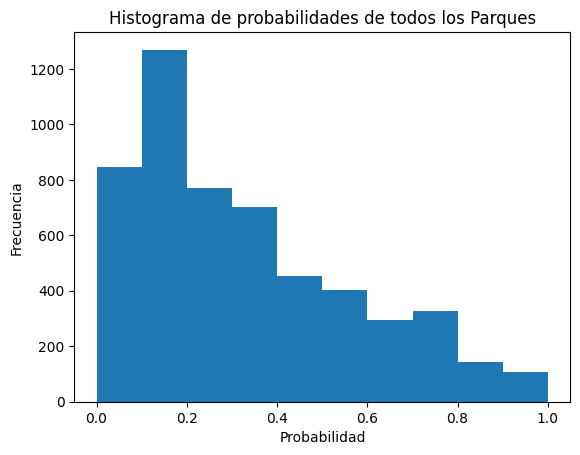

In [63]:
import matplotlib.pyplot as plt

plt.hist(probabilities, bins=10)
plt.xlabel('Probabilidad')
plt.ylabel('Frecuencia')
plt.title('Histograma de probabilidades de todos los Parques')
plt.show()

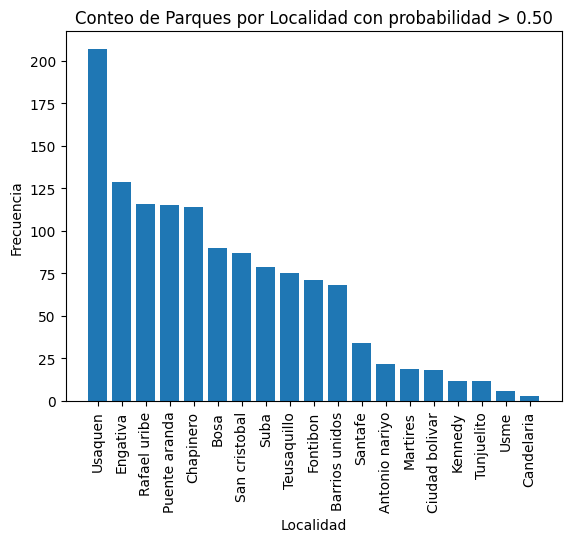

In [64]:
# Create a Boolean mask for probabilities greater than 0.50
mask_greater_than_0_50 = probabilities > 0.50

# Group the data by locality and calculate the frequency of probabilities greater than 0.50
tabla_localidades_1 = df_parques[mask_greater_than_0_50].groupby('Localidad').size().reset_index(name='Frequency')

# Sort the frequency table by the 'Frequency' column in descending order
tabla_localidades_1 = tabla_localidades_1.sort_values('Frequency', ascending=False)

# Plot the graph
plt.bar(tabla_localidades_1['Localidad'],tabla_localidades_1['Frequency'])
plt.xlabel('Localidad')
plt.xticks(rotation=90)
plt.ylabel('Frecuencia')
plt.title('Conteo de Parques por Localidad con probabilidad > 0.50')
plt.show()

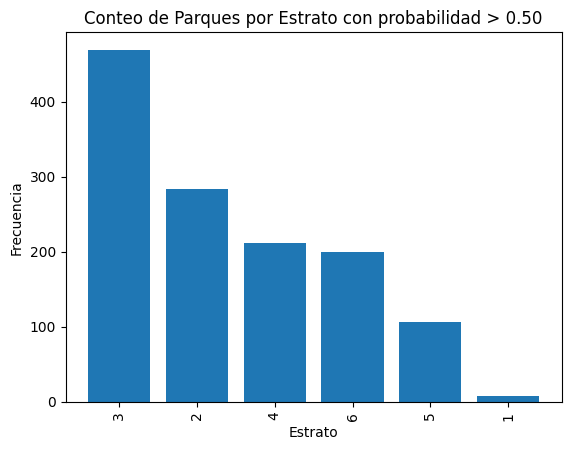

In [65]:
# Create a Boolean mask for probabilities greater than 0.50
mask_greater_than_0_50 = probabilities > 0.50

# Group the data by locality and calculate the frequency of probabilities greater than 0.50
tabla_estrato_1 = df_parques[mask_greater_than_0_50].groupby('Estrato').size().reset_index(name='Frequency')

# Sort the frequency table by the 'Frequency' column in descending order
tabla_estrato_1 = tabla_estrato_1.sort_values('Frequency', ascending=False)

# Plot the graph
plt.bar(tabla_estrato_1['Estrato'],tabla_estrato_1['Frequency'])
plt.xlabel('Estrato')
plt.xticks(rotation=90)
plt.ylabel('Frecuencia')
plt.title('Conteo de Parques por Estrato con probabilidad > 0.50')
plt.show()

## Análisis con Dataframe de Parques con Pacas

In [66]:
# Count the number of probabilities greater than 0.50
count_greater_than_0_50 = (probabilities_1 > 0.50).sum()

# Print the count
print("Numero de Parques con pacas con Probabilidades mayores a 0.50:", count_greater_than_0_50)

Numero de Parques con pacas con Probabilidades mayores a 0.50: 110


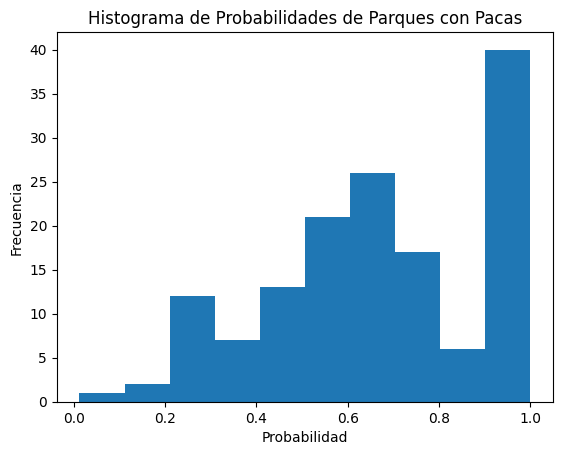

In [67]:
import matplotlib.pyplot as plt

plt.hist(probabilities_1, bins=10)
plt.xlabel('Probabilidad')
plt.ylabel('Frecuencia')
plt.title('Histograma de Probabilidades de Parques con Pacas')
plt.show()

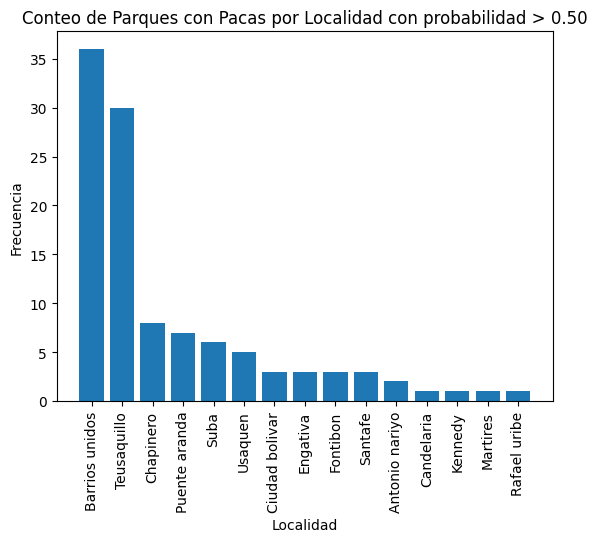

In [68]:
# Create a Boolean mask for probabilities greater than 0.50
mask_greater_than_0_50_1 = probabilities_1 > 0.50

# Group the data by locality and calculate the frequency of probabilities greater than 0.50
tabla_localidades_2 = df_f[mask_greater_than_0_50_1].groupby('Localidad').size().reset_index(name='Frequency')

# Sort the frequency table by the 'Frequency' column in descending order
tabla_localidades_2 = tabla_localidades_2.sort_values('Frequency', ascending=False)

# Plot the graph
plt.bar(tabla_localidades_2['Localidad'],tabla_localidades_2['Frequency'])
plt.xlabel('Localidad')
plt.xticks(rotation=90)
plt.ylabel('Frecuencia')
plt.title('Conteo de Parques con Pacas por Localidad con probabilidad > 0.50')
plt.show()

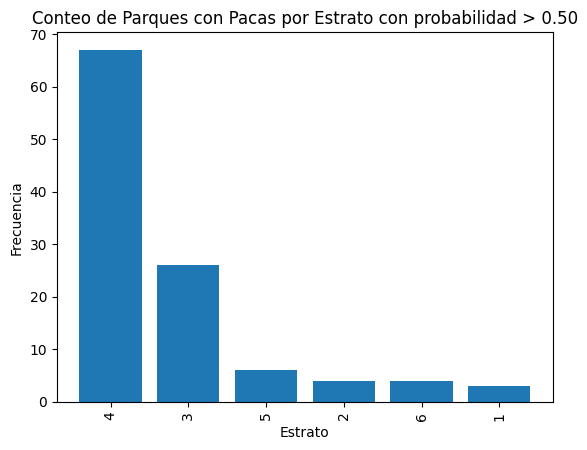

In [69]:
# Create a Boolean mask for probabilities greater than 0.50
mask_greater_than_0_50_1 = probabilities_1 > 0.50

# Group the data by locality and calculate the frequency of probabilities greater than 0.50
tabla_estrato_2 = df_f[mask_greater_than_0_50_1].groupby('Estrato').size().reset_index(name='Frequency')

# Sort the frequency table by the 'Frequency' column in descending order
tabla_estrato_2 = tabla_estrato_2.sort_values('Frequency', ascending=False)

# Plot the graph
plt.bar(tabla_estrato_2['Estrato'],tabla_estrato_2['Frequency'])
plt.xlabel('Estrato')
plt.xticks(rotation=90)
plt.ylabel('Frecuencia')
plt.title('Conteo de Parques con Pacas por Estrato con probabilidad > 0.50')
plt.show()

# MAPA 2

In [70]:
filtered_data = df_parques[df_parques['Probabilidad_Parque'] > 0.50]

In [71]:
import folium
import matplotlib.cm as cm 
import matplotlib.colors as colors 
from folium import GeoJson


map_2= folium.Map(location=[4.645454119819452, -74.12534820271203], zoom_start=11) 

# Define a custom color palette using matplotlib colormap
color_map = cm.get_cmap('RdYlGn')  # Choose a colormap (e.g., 'YlOrRd', 'BuPu', 'RdYlBu', etc.)


# Define a function to set the fill color based on probability
def style_function(feature):
    prob = feature['properties']['Probabilidad_Parque']
    normalized_prob = prob
    color = color_map(normalized_prob)
    rgb = [int(c * 255) for c in color[:3]]  # Convert the color to RGB values
    return {
        'fillColor': f'rgb({rgb[0]},{rgb[1]},{rgb[2]})',
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.7
    }

# Add the GeoJson layer with styled polygons and popups
geojson_2 = folium.GeoJson(
    filtered_data,
    style_function=style_function,
    tooltip=folium.features.GeoJsonTooltip(fields=['Nombre_parque', 'Estrato', 'Tipo_Parque', 'Localidad', 'Area', 'Largo', 'Tipo_Parque_E', 'Poblacion', 'Densidad', 'Probabilidad_Parque'], 
                                           aliases=['Park Name', 'Estrato', 'Park Type', 'Locality', 'Area', 'Length', 'Park Type E', 'Population', 'Density', 'Probability'],
                                           labels=True,
                                           sticky=True),
    popup=folium.features.GeoJsonPopup(fields=['Nombre_parque', 'Estrato', 'Tipo_Parque', 'Localidad', 'Area', 'Largo', 'Tipo_Parque_E', 'Poblacion', 'Densidad', 'Probabilidad_Parque'], 
                                       aliases=['Park Name', 'Estrato', 'Park Type', 'Locality', 'Area', 'Length', 'Park Type E', 'Population', 'Density', 'Probability']),
)
geojson_2.add_to(map_2)

<ipython-input-71-fcacc7f9d0c8>:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('RdYlGn')  # Choose a colormap (e.g., 'YlOrRd', 'BuPu', 'RdYlBu', etc.)


In [72]:
map_2

Output hidden; open in https://colab.research.google.com to view.

In [73]:
# Iterate over the GeoDataFrame rows and add a marker for each point
for idx, row in df.iterrows():
    # Extract the relevant information from the row
    name = row['Nombre_Paca']
    geometry = row['geometry']

    # Create a marker and add it to the map
    popup_text = f'<b>{name}'
    marker = folium.Marker(location=[geometry.y, geometry.x], popup=popup_text)
    marker.add_to(map_2)

# Display the map
map_2

Output hidden; open in https://colab.research.google.com to view.

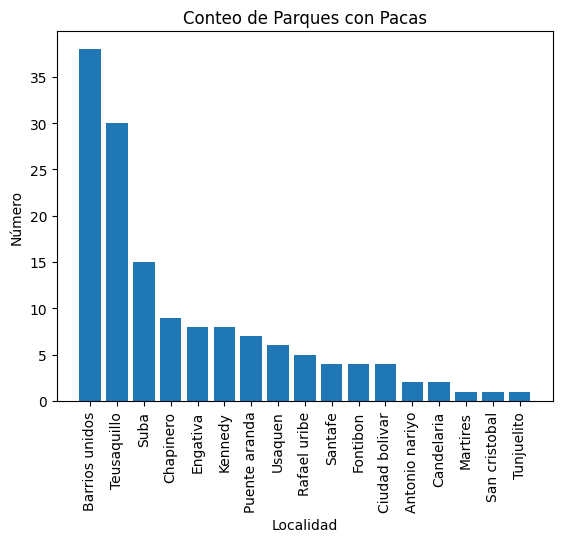

In [74]:
vc_localidad = df['Localidad'].value_counts()
# Plotting the graph
plt.bar(vc_localidad.index, vc_localidad.values)
plt.xlabel('Localidad')
plt.xticks(rotation=90)
plt.ylabel('Número')
plt.title('Conteo de Parques con Pacas')
plt.show()

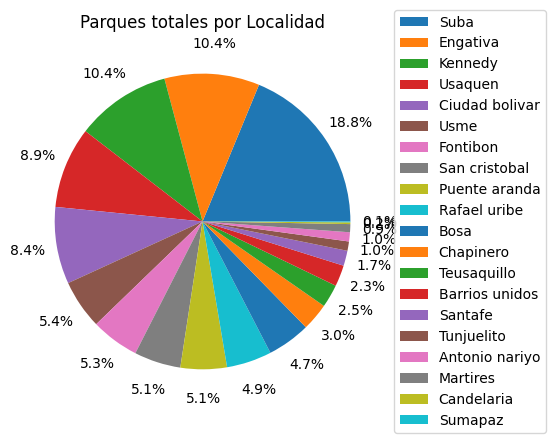

In [75]:
# Plotting the pie chart
vc_localidad_t = df_parques['Localidad'].value_counts()
plt.pie(vc_localidad_t, labels=None, autopct='%1.1f%%', pctdistance=1.2)
# Create legend outside the pie chart
plt.legend(vc_localidad_t.index, loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Parques totales por Localidad')
plt.show()

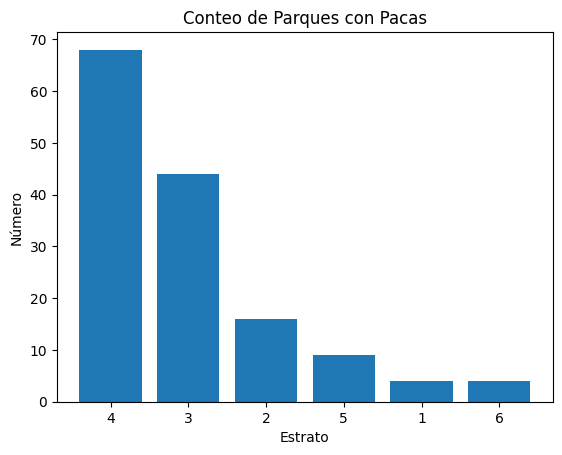

In [76]:
vc_estrato = df['Estrato'].value_counts()
# Plotting the graph
plt.bar(vc_estrato.index, vc_estrato.values)
plt.xlabel('Estrato')
plt.ylabel('Número')
plt.title('Conteo de Parques con Pacas')
plt.show()

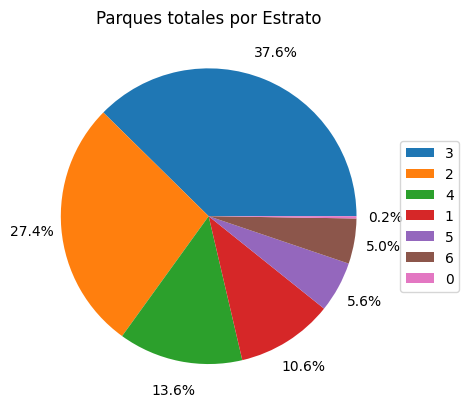

In [77]:
# Plotting the pie chart
vc_estrato_t = df_parques['Estrato'].value_counts()
plt.pie(vc_estrato_t, labels=None, autopct='%1.1f%%', pctdistance=1.2)
# Create legend outside the pie chart
plt.legend(vc_estrato_t.index, loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Parques totales por Estrato')
plt.show()